<a href="https://colab.research.google.com/github/AdwaitJadhav/Perceptron_MLAlgortihm/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
class Perceptron(object):
  def __init__(self,lr=0.01,iter=50,random_state=1):
    self.lr=lr #learning rate, it is in between 0.0 and 1.0
    self.iter=iter #number of iterations to pass over the dataset
    self.random_state=random_state #used for random weight initialization
  
  def fit(self, X, y):
    rgen=np.random.RandomState(self.random_state)
    self.w=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])  # used to generate random small numbers from [0,1] for weight initialization, loc=0.0 means mean is 0 and state is used for standard deviation, while X.shape[1]
    self.errors=[]
    for i in range(self.iter):
      error=0
      for xi, target in zip(X,y): 
        update=self.lr*(target-self.predict(xi)) #updated weights = n(y-y^)
        self.w[1:] += update*xi
        self.w[0] += update
        error += int(update != 0.0)
      self.errors.append(error)
    return self
  
  def net_input(self, X):
    return np.dot(X,self.w[1:]+self.w[0]) # dot used for inner product in 1d arrays and matrix multiplication in multiD-arrays, here it is calculating z=w0*x0+w1x1.....

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0,1,-1) # this is the unit step function which is used to check if the predicted output is correct or positvely/negatively incorrect

In [14]:
df= pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


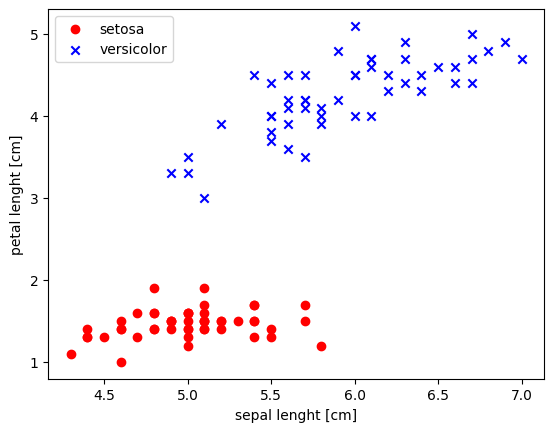

In [15]:
y = df.iloc[0:100, 4].values #select first 100 class labels where 50 correspond to iris setosa,and 50 to iris versicolor
y = np.where(y == 'Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values # extract sepal lenght and petal lenght for first 100 class labels
#plot the data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show()

1


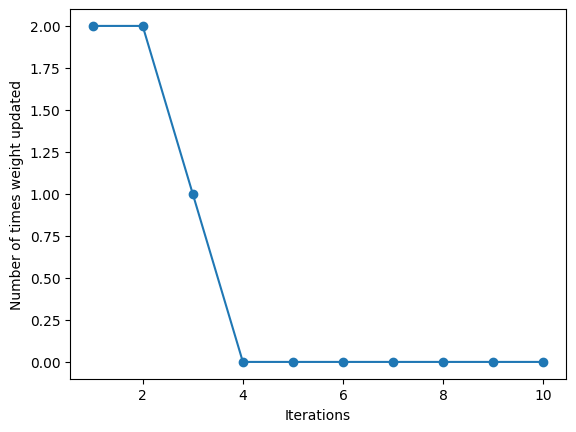

In [40]:
ppn = Perceptron(lr=0.1, iter=10) # creating an object of the Perceptron class
ppn.fit(X, y) # calling the fit method to train the algorithm on the given dataset
print(ppn.predict([1.5,1.5]))
#plot the missclassifications to find if the algorithm converged or not

plt.plot(range(1, len(ppn.errors)+1), ppn.errors, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Number of times weight updated')
plt.show()

#try and change the learning rate to see how it affects convergence,
#larger value of learning rate will take bigger steps towards convergence but may sometimes overshoot it and may not converge at all
#a small learning rate leads to a stale model, but it will take more time to converge
# try lr=0.1  and lr=0.01 to see a noticible difference

<ipython-input-33-f11b9628c093>:25: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


<function matplotlib.pyplot.show(close=None, block=None)>

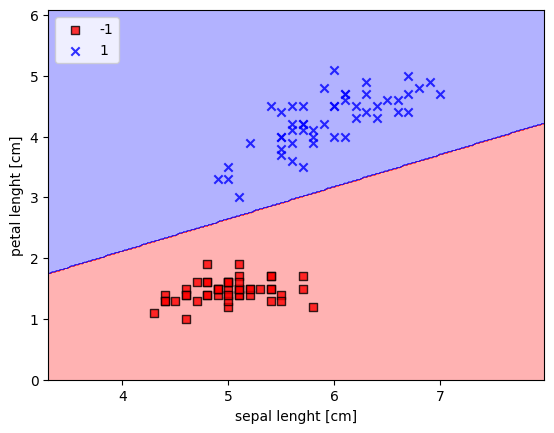

In [33]:

from matplotlib.colors import ListedColormap

#no need to understand this part of the code, this is just to plot the decision boundary

def plot_decision_regions(X, y, classifier, resolution=0.02):

  #setup marker generator and color map
  markers=('s', 'x', 'o', '^', 'v')
  colors=('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  #plot decision surface
  x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
  x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  z=z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  #plot class samples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
    
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal lenght [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show


In [53]:
print(ppn.predict([1.5,0.5])) # test and see whether we get the correct predictions based on the graph above

-1
